In [1]:
path = r"G:\target_strength\2020_05_22_TS\*.wav"
# filename = r"\S4A02746_20000104_124448.wav"
# file = path + filename
from glob import glob 

In [2]:
path

'G:\\target_strength\\2020_05_22_TS\\*.wav'

In [3]:
filelist = glob(path)

In [4]:
# from scipy.io import wavfile (do not support 24bits depth)
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib notebook

In [5]:
class SL():
    def __init__(self, file):
        self.file = file
        self.bits = 24
        self.range = 2
        title = self.file.split('\\')[-1].split('.')[0].split('_')
        self.plot_title = title[1] + "_" + title[2]
        self.freq = title[2]
        print("title: {}".format(self.plot_title))
    def readWavFileToArray(self):
#         fp = open(self.file, 'r')
#         self.fs, self.values = wavfile.read(self.file)
#         self.values = self.values*(self.range/pow(2,self.bits))
        self.values, self.fs = sf.read(self.file)
        self.length = len(self.values)
        self.time = np.arange(self.length)/self.fs
        print("total lenght: {}, time duration: {}".
              format(self.length, self.length//self.fs))
    def plot(self):
        plt.plot(self.time, self.values)
        plt.title(self.plot_title)
    def findPeakIndex(self, threshold):
        mask = ((self.values[1:-1]-self.values[2:])>0)*((self.values[1:-1]-self.values[:-2])>0)*(self.values[1:-1]>threshold)
        self.indexs = []
        for index, i in enumerate(mask):
            if(i):
                self.indexs.append(index+1)
        count=1
        self.indexs = np.array(self.indexs)
        diff = self.indexs[1:]-self.indexs[:-1]
        
        start_skip=0
        end_skip=1
        self.category=[]
        self.category.append(self.indexs[start_skip])
        for index, value in enumerate(diff):
            if value>self.fs:
                count+=1
                self.category.append(self.indexs[index-end_skip])
                self.category.append(self.indexs[index+1+start_skip])
        self.category.append(self.indexs[-(1+end_skip)])
        print("total sound generated: {}".format(count))
    def plotWithPeak(self):
        fig, ax = plt.subplots()
        ax.plot(self.time, self.values)
        ax.plot(self.time[self.indexs], self.values[self.indexs], 'o')
        ax.set_title(self.plot_title)
        fig.tight_layout()
    def plotWithFilterPeak(self):
        fig, ax = plt.subplots()
        ax.plot(self.time, self.values)
        ax.plot(self.time[self.category], self.values[self.category], 'o')
        ax.set_title(self.plot_title)
        fig.tight_layout()
    
    def rms(self, x):
        return np.sqrt(np.mean(x*x))
    def calculateSL(self):
        self.sen = -207
        length = len(self.category)
        print()
        if (length%2==0 and length>0):
            self.SL=[]
            for i in range(length//2):
                start = self.category[2*i]
                end = self.category[2*i+1]
                v = self.rms(self.values[start:end])
                sl = 20*math.log10(v)-self.sen
                self.SL.append(sl)
        else:
            print("the peak is wrong or empty, check the plot with peak")
    def getSL(self):
        return self.SL
    def getData(self):
        return self.values
    def getIndex(self):
        return self.indexs
    def getTime(self):
        return self.time

In [6]:
filelist

['G:\\target_strength\\2020_05_22_TS\\1723_AI0_10k.wav',
 'G:\\target_strength\\2020_05_22_TS\\1723_AI1_10k.wav',
 'G:\\target_strength\\2020_05_22_TS\\1726_AI0_9k.wav',
 'G:\\target_strength\\2020_05_22_TS\\1726_AI1_9k.wav',
 'G:\\target_strength\\2020_05_22_TS\\1729_AI0_8k.wav',
 'G:\\target_strength\\2020_05_22_TS\\1729_AI1_8k.wav',
 'G:\\target_strength\\2020_05_22_TS\\1732_AI0_7k.wav',
 'G:\\target_strength\\2020_05_22_TS\\1732_AI1_7k.wav',
 'G:\\target_strength\\2020_05_22_TS\\1734_AI0_6k.wav',
 'G:\\target_strength\\2020_05_22_TS\\1734_AI1_6k.wav',
 'G:\\target_strength\\2020_05_22_TS\\1737_AI0_5k.wav',
 'G:\\target_strength\\2020_05_22_TS\\1737_AI1_5k.wav',
 'G:\\target_strength\\2020_05_22_TS\\1745_AI0_4k.wav',
 'G:\\target_strength\\2020_05_22_TS\\1745_AI1_4k.wav',
 'G:\\target_strength\\2020_05_22_TS\\1748_AI0_3k.wav',
 'G:\\target_strength\\2020_05_22_TS\\1748_AI1_3k.wav']

In [7]:
SL_raw = {}
SL_report = {}
for index, file in enumerate(filelist):
    if index%2==0:
        threshold = 0.12
    else:
        threshold = 0.06
    a = SL(file)
    a.readWavFileToArray()
    a.findPeakIndex(threshold)
    a.calculateSL()
    data = a.getSL()
    SL_raw[a.plot_title]=data
    
    sl = np.array(data)
    SL_report[a.plot_title]=(np.mean(sl))

title: AI0_10k
total lenght: 11950000, time duration: 116
total sound generated: 24

title: AI1_10k
total lenght: 11950000, time duration: 116
total sound generated: 24

title: AI0_9k
total lenght: 19050000, time duration: 186
total sound generated: 36

title: AI1_9k
total lenght: 19050000, time duration: 186
total sound generated: 36

title: AI0_8k
total lenght: 12925000, time duration: 126
total sound generated: 25

title: AI1_8k
total lenght: 12925000, time duration: 126
total sound generated: 25

title: AI0_7k
total lenght: 15125000, time duration: 147
total sound generated: 30

title: AI1_7k
total lenght: 15125000, time duration: 147
total sound generated: 30

title: AI0_6k
total lenght: 17300000, time duration: 168
total sound generated: 34

title: AI1_6k
total lenght: 17300000, time duration: 168
total sound generated: 34

title: AI0_5k
total lenght: 23450000, time duration: 229
total sound generated: 45

title: AI1_5k
total lenght: 23450000, time duration: 229
total sound gener

In [8]:
SL_raw

{'AI0_10k': [188.4459437186846,
  188.43262639638584,
  188.41053994011335,
  188.39651652038611,
  188.3771362856633,
  188.3743143920326,
  188.35594855657718,
  188.33710029530178,
  188.33332190826016,
  188.31875757933167,
  188.35741344548217,
  188.3124747095806,
  188.31870956812082,
  188.2915595175661,
  188.30076457175383,
  188.26854141084945,
  188.27809731735135,
  188.2582258844595,
  188.30225784221085,
  188.25524992524942,
  188.25958835470047,
  188.31787469616103,
  188.29659045842854,
  188.25729769515416],
 'AI1_10k': [182.9894346268277,
  182.9606977191839,
  182.90667285440222,
  182.90672922837197,
  182.92234458571613,
  182.90090109438026,
  182.87367879158037,
  182.84538799238706,
  182.8869766700022,
  182.7976977246882,
  182.88899719240052,
  182.908980814303,
  182.82784112145796,
  182.83219647788857,
  182.89340873618858,
  182.82429646817377,
  182.8782157381431,
  182.777337949522,
  182.8233068511666,
  182.73412641546614,
  182.8263977429066,
  18

In [9]:
SL_report

{'AI0_10k': 188.32736879124187,
 'AI1_10k': 182.86206713301908,
 'AI0_9k': 190.36011106034653,
 'AI1_9k': 184.8931622730255,
 'AI0_8k': 192.85869445695565,
 'AI1_8k': 187.46774744641417,
 'AI0_7k': 194.60318329721036,
 'AI1_7k': 189.34265282590374,
 'AI0_6k': 195.074793987685,
 'AI1_6k': 188.4554855921988,
 'AI0_5k': 196.073553255599,
 'AI1_5k': 188.42629604829517,
 'AI0_4k': 192.85860466503354,
 'AI1_4k': 187.07312144681526,
 'AI0_3k': 185.76868478042059,
 'AI1_3k': 180.41336882866162}

In [10]:
# SL_raw={}

In [11]:
sl_label = np.array(['3k', '4k', '5k', '6k', '7k', '8k', '9k', '10k'])
sl_label

array(['3k', '4k', '5k', '6k', '7k', '8k', '9k', '10k'], dtype='<U3')

In [12]:
sl_values = np.array(list(SL_report.values()))
sl_values

array([188.32736879, 182.86206713, 190.36011106, 184.89316227,
       192.85869446, 187.46774745, 194.6031833 , 189.34265283,
       195.07479399, 188.45548559, 196.07355326, 188.42629605,
       192.85860467, 187.07312145, 185.76868478, 180.41336883])

In [13]:
SL_label=['AI0_3k','AI0_4k','AI0_5k','AI0_6k','AI0_7k','AI0_8k','AI0_9k','AI0_10k']

<IPython.core.display.Javascript object>


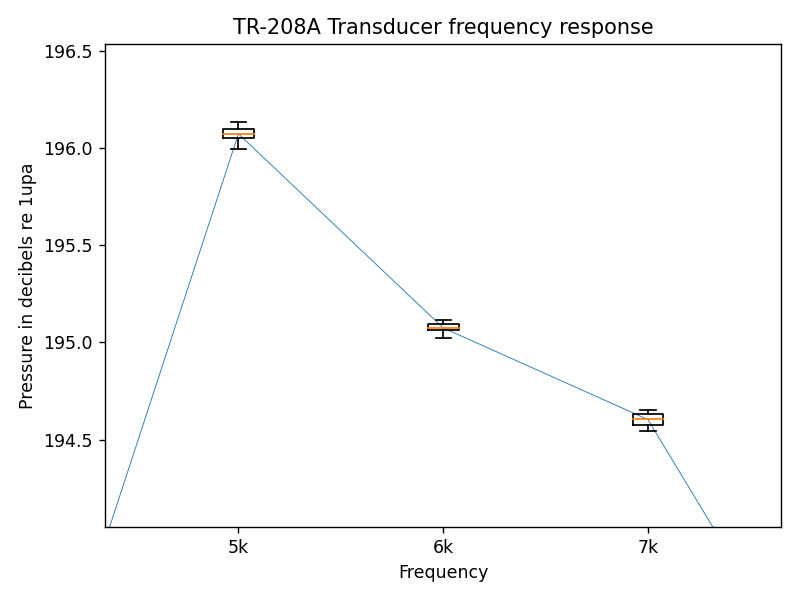

In [14]:
i = np.arange(1,9)
sl_values[-2*i]
fig, ax = plt.subplots()
ax.plot(i, sl_values[-2*i],'-', linewidth=0.5)
for index in range(len(SL_label)):
    ax.boxplot(x=SL_raw[SL_label[index]], sym='', positions=[index+1])
ax.set_ylim(bottom=180, top=200)
ax.set_ylabel("Pressure in decibels re 1upa")
ax.set_xlabel("Frequency")
ax.set_title("TR-208A Transducer frequency response")
plt.xticks(i,sl_label)
fig.tight_layout()

In [15]:
np.save('data_log/SL_raw.npy', SL_raw)
np.save('data_log/SL_report.npy', SL_report)

In [16]:
read_dictionary = np.load('data_log/SL_raw.npy',allow_pickle='TRUE').item()
# read_dictionary

In [17]:
read_dictionary = np.load('data_log/SL_report.npy',allow_pickle='TRUE')

In [18]:
type(read_dictionary)

numpy.ndarray

In [19]:
np.savetxt('data_log/SL_report.csv', SL_report)

ValueError: Expected 1D or 2D array, got 0D array instead

In [31]:
np.savetxt("data_log/sl_raw.csv", np.array(list(SL_raw.values())))

TypeError: Mismatch between array dtype ('object') and format specifier ('%.18e')

In [46]:
names = ['id','data']
formats = ['str','f8']
dtype = dict(names = names, formats=formats)
array=np.array(list(SL_raw.values()))

ValueError: setting an array element with a sequence.

In [47]:
np.savetxt("data_log/sl_raw.csv", array)

TypeError: Mismatch between array dtype ('object') and format specifier ('%.18e')

In [82]:
data = []
for i, index in enumerate(SL_raw):
    if i%2==0:
        data.append(len(SL_raw[index]))

In [83]:
data

[24, 36, 25, 30, 34, 45, 18, 23]

In [77]:
SL_raw("AI0_10k")

TypeError: 'dict' object is not callable

In [80]:
data = np.array(data, dtype=np.float64)

In [81]:
np.savetxt("data_log/sl_raw.csv", data)

In [64]:
data.dtype

dtype('O')

In [67]:
data

array([list([188.4459437186846, 188.43262639638584, 188.41053994011335, 188.39651652038611, 188.3771362856633, 188.3743143920326, 188.35594855657718, 188.33710029530178, 188.33332190826016, 188.31875757933167, 188.35741344548217, 188.3124747095806, 188.31870956812082, 188.2915595175661, 188.30076457175383, 188.26854141084945, 188.27809731735135, 188.2582258844595, 188.30225784221085, 188.25524992524942, 188.25958835470047, 188.31787469616103, 188.29659045842854, 188.25729769515416]),
       list([190.25047014075602, 190.2623588297862, 190.26556052343022, 190.27698882517586, 190.29325358382087, 190.33260635687452, 190.30773845377627, 190.30416364573173, 190.32006637852214, 190.32297357160104, 190.3790169075204, 190.34342806125474, 190.32692233419178, 190.34787891108914, 190.3547335919753, 190.3602864066221, 190.37871834605676, 190.39045163825554, 190.3577089417247, 190.36503699954605, 190.37353893305385, 190.39139803223657, 190.41062052588154, 190.41195322538925, 190.37755438533188, 190